# ** Investigating a TMDd-5000-Movie-Dataset**

### Dain Russell, 2020

### Udacity Data Analyst Nanodegree Project 2






## **Table of Contents**

* [Introduction](#introduction)
* [Data Wrangling](#data wrangling)
    * [General Properties](#general properties)
    * [Dataset Observations](#dataset observations)
    * [Data Cleaning](#data cleaning)
* [Exploratory Data Analysis](#exploratory data analysis)   
    * [What is the number of movies released each year?](#research question 1)
    * [How long are the movies?](#research question 2)
    * [What is the average budget and revenue for the movies?](#research question 3)
    * [What is the relationship between movie budget and revenue?](#research question 4)
    * [How many movies in each genre?](#research question 5)
    * [What is the most profitable movie?](#research question 6)
* [Conclusion](#conclusion)
* [Citations](#citations)



## **Introduction** <a class="anchor" id="introduction"></a>
> In this project, we analyzed a dataset and then communicated the findings about it. We used the Python libraries NumPy, pandas, and Matplotlib to make your analysis easier.

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> I will explore the following questions:
1. What is the number of movies released each year?
2. How long are the movies?
3. What is the average budget and revenue for the movies?
4. What is the relationship between movie budget and revenue?
5. How many movies in each genre?
6. What is the most profitable movie?



#### Let's get started!
We set up the import statements for all of the packages we plan to use.



In [41]:
# import statements for all of the packages 
import pandas as pd  
import numpy as np  
import csv 
import seaborn as sns
import matplotlib.pyplot as plt

# 'magic word' so that your visualizations are plotted
%matplotlib inline




## **Data Wrangling**<a class="anchor" id="data wrangling"></a>
In this section of the report, we're going to load and read our data. Then we check and see if we need to clean up the data for analysis. 



### **General Properties**<a class="anchor" id="general properties"></a>


Here we load and read the data into the pandas dataframe we are calling `df`.

**Now let's preview the first 5 rows of our data.**

In [42]:
# Load and Read the CSV File Using Pandas read_csv function
df = pd.read_csv('tmdb-movies.csv', sep=',')

#printing first five rows with defined columns of tmdb-movies database
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Observation:** I have a dataset containing movie information that includes, budget, revenue, runtime and name of a different genres of movies. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. I will be dropping some of these columsn later as I do not need them all for my analysis.

**Description of the raw dataset columns:-**

* id - A unique identifier for each movie.
* popularity - A numeric quantity specifying the movie popularity.
* budget - The budget in which the movie was made.
* revenue - The worldwide revenue generated by the movie.
* original_title - The title of the movie before translation or adaptation.
* cast - The name of lead and supporting actors.
* homepage - A link to the homepage of the movie.
* director - Movie Director
* tagline - Movie's tagline.
* overview - A brief description of the movie.
* runtime - The running time of the movie in minutes.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* production_companies - The production house of the movie.
* release_date - The date on which it was released.
* vote_count - the count of votes recieved.
* vote_average - average ratings the movie recieved.
* release_year - Movie release year
* budget_adj- show the budget of the associated movie in terms of 2010 dollars, accounting for
* revenue_adj- show the revenue of the associated movie in terms of 2010 dollars, accounting for




**Generating the shape of our original dataframe in terms of Rows and Columns.**

In [43]:
# dataframe.shape 
# Get the number of rows and columns
print(("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1])))


There are 10866 rows and 21 columns in the dataset.


**Let's get a summary of the dataset that includes index and column dtypes, non-null values and memory usage**

In [44]:
#raw datset summary that displays missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Observation** 
* As mentioned from the display of the raw dataset, there are columns which will not be used.
* From the above summary you can see there are columns with significant null values: idmb_id; cast; homepage; director; tagline; keywords; overview; genres and production_companies. 
* You can also see the different data types for each columns as well. 



**Descriptive Summary Statistics on Raw Data.**

In [45]:
##### this function will generate decriptive statistics summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Observation**
* From this summary we observe that there are minimum values are zero values for runtime, budget, revenue, budget_adj and revenue_adj
* The movies have a mean popularity of 0.6 with at least 50% having a popularity value of 0.4. The max popularity is 33 and the minimum value is 0. The movies have a mean budget is 3.091321e+07. Both the minimum values for budget and revenue are 0.

**It is very important we address missing values so let's take another look with this heatmap.**

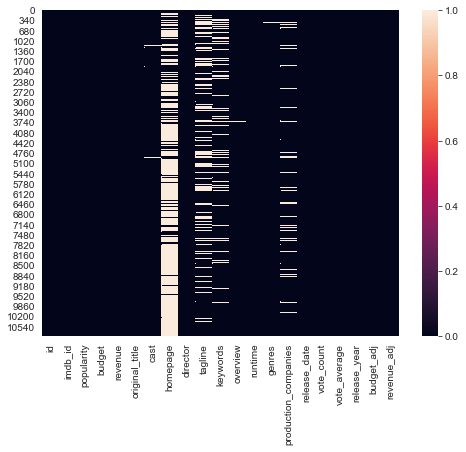

imdb_id's null rate :0.09%
cast's null rate :0.7%
homepage's null rate :72.98%
director's null rate :0.4%
tagline's null rate :25.99%
keywords's null rate :13.74%
overview's null rate :0.04%
genres's null rate :0.21%
production_companies's null rate :9.48%


In [47]:
#plot a heatmap to visualize the location of missing values
plt.figure(figsize=(8,6))

sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))


**Observation** 
* homepage' has a 73% null rate clearly seen on the map. 'imdb_id', 'cast', 'director','overview' and 'genre' have very few missing values.

In [7]:
#counting zero values in each column.
df_budget_count =  df.groupby('budget').count()['id']
df_budget_count.head(2)


budget
0    5696
1       4
Name: id, dtype: int64

In [8]:
#counting zero values in each column.
df_revenue_count =  df.groupby('revenue').count()['id']
df_revenue_count.head(2)


revenue
0    6016
2       2
Name: id, dtype: int64

In [9]:
#counting zero values in each column.
df_revenue_adj_count =  df.groupby('revenue_adj').count()['id']
df_revenue_adj_count.head(2)

revenue_adj
0.000000    6016
2.370705       1
Name: id, dtype: int64

In [10]:
#counting zero values in each column.
df_budget_adj_count =  df.groupby('budget_adj').count()['id']
df_budget_adj_count.head(2)

budget_adj
0.000000    5696
0.921091       1
Name: id, dtype: int64

In [11]:
#counting zero values in each column.
df_runtime_count =  df.groupby('runtime').count()['id']
df_runtime_count.head(2)


runtime
0    31
2     5
Name: id, dtype: int64

**Observation:** There are a lot of zero values specifically in budget ,revenue, budget_adj and revenue_adj. It is best we decide to keep the zero values.

### **Data Cleaning**<a class="anchor" id="data cleaning"></a>
Let's clean up the data in order to make it easier to handle since we are only focusing on just a few columns.

1. Drop Columns
2. Drop the duplicate values
3. Keeping zero values and replacing with NaN(Not a Number) values
4. Filling zero value with mean

    Formatting relq1ease_date from  string format to datetime format





**Dropping Columns that are not needed and set `inplace=True` so we keep the changes**

* Since we are not going to need all these columns for our analysis, we will be dropping some of the columns. That is good so we have less columns to clean.

In [49]:
# this function will drop columns using the list of column names
df.drop(['homepage','overview','keywords', 'imdb_id', 'production_companies','cast', 'director', 'tagline',], axis=1, inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

**Dataset after dropping unwanted columns.**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


**The data looks much cleaner just by dropping the unwanted column. The genres column is the only one missing**

In [56]:
df[df.genres.isnull()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,0.129696,0,0,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,0,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,0.130018,0,0,Vizontele,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


**Dropping duplicates and confirm there are none**

In [15]:
# drop duplicates 
df.drop_duplicates(inplace=True)



# print number of duplicates 
df.duplicated().sum()

0

**So recall I decided to keep the zero values instead of dropping them since there were so many in budget and revenue.
We will instead, replace the zero values in each of the 3 columns  with NaN.**

In [63]:
#replace zero values with null values in all 3 columns to NaN.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)
df['runtime'] =df['runtime'].replace(0, np.NAN)

# see if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          5170 non-null   float64
 3   revenue         4850 non-null   float64
 4   original_title  10866 non-null  object 
 5   runtime         10835 non-null  float64
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      5170 non-null   float64
 12  revenue_adj     4850 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1.1+ MB


**Let's try replacing the zero values with the mean as well**

In [64]:
#fill the null values with them mean
df.fillna(df.mean(), inplace=True);
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  float64
 3   revenue         10866 non-null  float64
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  float64
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1.1+ MB


**Observation**
You will notice the only column that did not fill is genre. That is because it is not numeral but a string object.

Descriptive Statistics Summary after filling null values with the mean

In [66]:
#this function will generate decriptive statistics summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,2.683152e+07,1.082704e+08,30.902777,575.619058,0.935142,12.812941,2.893963e+07,1.328370e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,1.928750e+07,4.109376e+07,90.000000,17.000000,5.400000,1995.000000,2.460594e+07,5.877732e+07
50%,20669.000000,0.383856,3.073943e+07,8.922066e+07,99.000000,38.000000,6.000000,2006.000000,3.688774e+07,1.150774e+08
75%,75610.000000,0.713817,3.073943e+07,8.922066e+07,111.000000,145.750000,6.600000,2011.000000,3.688774e+07,1.150774e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Observation:** All minimum zero values confirmed to be replaced with null the mean

In [65]:
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


**One last thing- let's change the data type for release_date to datetime format**

In [20]:
# convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# confirm changes
df.dtypes
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

# **Exploratory Data Analysis**<a class="anchor" id="exploratory data analysis"></a>


**Using a histogram to visualize what the data looks like for each column.**

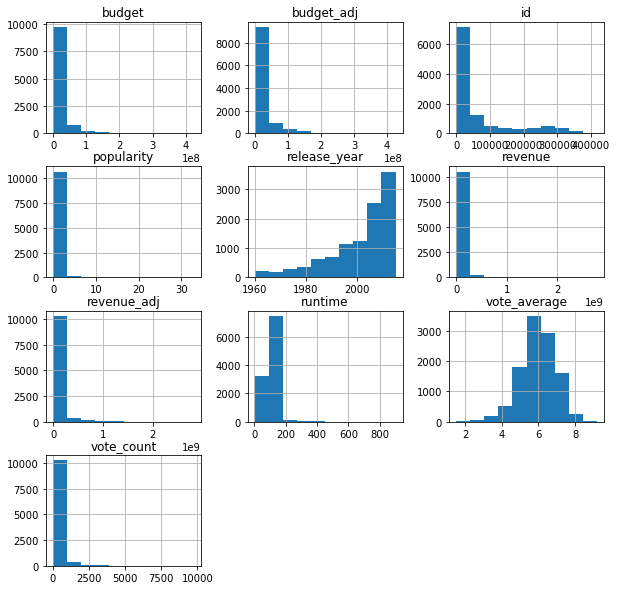

In [21]:
#calling the pandas `hist`() method returns histograms for all columns in the series.
df.hist(figsize=(10,10));

### What are the number of movies released each year?<a class="anchor" id="research question 1"></a>

In [22]:
#grouping number of movies by year
movie_released= df.groupby('release_year').count()['id']
movie_released.head()


release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

Text(0, 0.5, 'Number of Movies')

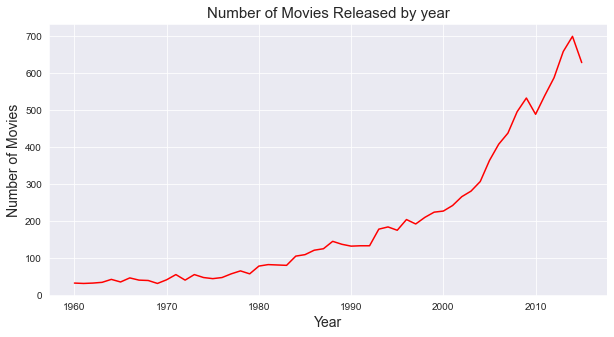

In [23]:
# visualization

#set the sheet style
sns.set_style('darkgrid')
x = movie_released.index
y = movie_released
plt.figure(figsize=(10,5))
plt.plot(x, y, color='red')
plt.title('Number of Movies Released by year', fontsize = 15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)


**Observation**
* We see that there are between 30 to 100 movies released each year between 1960 and 1980.
* By year 2000, we are up to 200 movies per year then a sharp increase to 700 movies 15 years later.


### How long are the movies?<a class="anchor" id="research question 2"></a>

In [24]:
#defining a function to find the mean of a column
df['runtime'].mean()


102.36385453202878

In [25]:
#desriptive statistics for runtime column
df['runtime'].describe()

count    10865.000000
mean       102.363855
std         30.904039
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

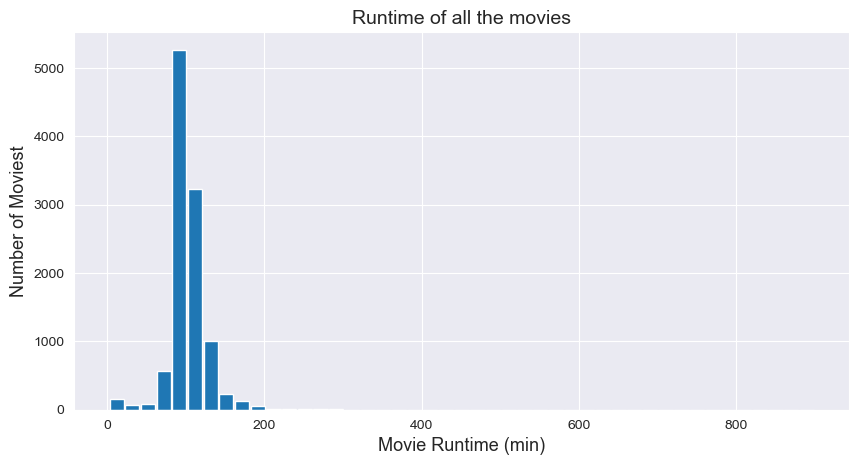

In [26]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(10,5), dpi = 100)

#On x-axis 
plt.xlabel('Movie Runtime (min)', fontsize = 13)
#On y-axis 
plt.ylabel('Number of Moviest', fontsize=13)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=14)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =45)
#displays the plot
plt.show()

**Observation**
* The mean runtime for a movie in the dataset is 102 minutes.
* There is a move that runs 900 minutes, that is too long.
* 20% of movies have a runtime of 90 minutes. 50% of the movies have a runtime of 99 minutes, 75% have runtime over 111 minutes.

### What is the average budget and revenue for the movies?<a class="anchor" id="research question 3"></a>

**Movie Budget**

In [27]:
#desriptive statistics for budget column
df['budget_adj'].mean()

36889069.20400049

In [28]:
#desriptive statistics for budget column
df['budget_adj'].describe()

count    1.086500e+04
mean     3.688907e+07
std      2.894088e+07
min      9.210911e-01
25%      2.460594e+07
50%      3.688907e+07
75%      3.688907e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

**Observation**
* The average budget for movies in the dataset is USD 37 Million Dollars.
 

**Movie Revenue**

In [29]:
#desriptive statistics for budget column
df['revenue_adj'].mean()

115100887.62833627

In [30]:
#desriptive statistics for budget column
df['revenue_adj'].describe()

count    1.086500e+04
mean     1.151009e+08
std      1.328386e+08
min      2.370705e+00
25%      5.878518e+07
50%      1.151009e+08
75%      1.151009e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

**Observation**
* The average revenue for movies in the dataset is USD 115 Million Dollars.

### What is the relationship between movie budget and revenue?<a class="anchor" id="research question 4"></a>

In [31]:
budgets = df.groupby('release_year').mean()['budget_adj']
revenues = df.groupby('release_year').mean()['revenue_adj']

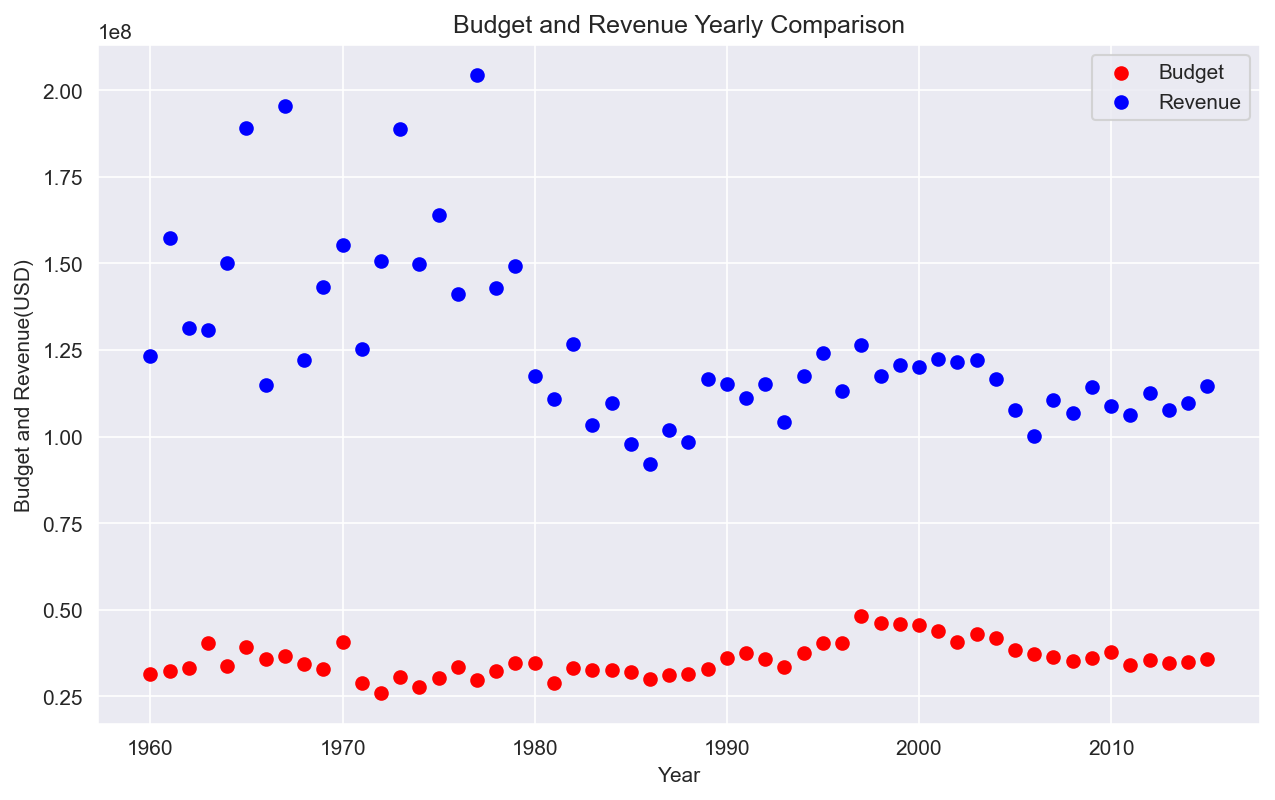

In [32]:
# line graph
sns.set_style('darkgrid')
x1 = budgets.index
y1 = budgets
x2 = revenues.index
y2 = revenues
plt.figure(figsize=(10,6), dpi = 150)
plt.scatter(x1, y1, color='red', label = 'Budget')
plt.scatter(x2, y2, color='blue', label = 'Revenue')
plt.title('Budget and Revenue Yearly Comparison')
plt.xlabel('Year')
plt.ylabel('Budget and Revenue(USD)')
plt.legend(loc = 'upper right')
plt.show();

**Observation**
* Budget and Revenue have a postively correlated relationship.The revenue has remained higher than the budget throughout the years.

### How many movies in each genre?<a class="anchor" id="research question 5"></a>

In [33]:
# combine cells of genre column
def extract_data(genres):
    data = df[genres].str.cat(sep = '|')
    
    #separate cells with '|' pipe delimiter
    data= pd.Series(data.split('|')) 
    
    #calculate number of occurences of each genre category
    count= data.value_counts(ascending=False)   
    
    return count   

    

In [34]:
genres = extract_data('genres')
genres.head(20)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

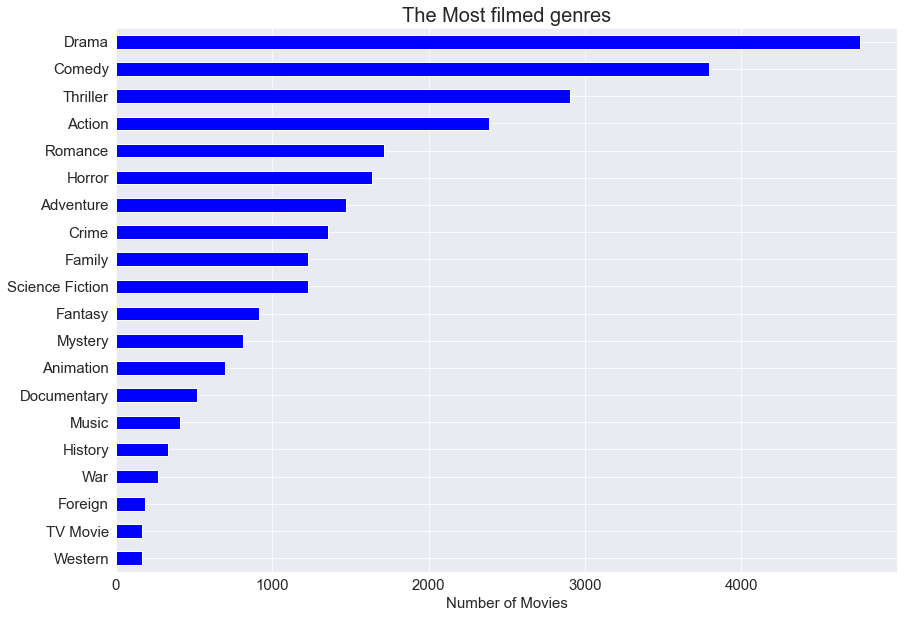

In [35]:
# visualization 
sns.set_style('darkgrid')

genres.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genres.plot.barh(color = 'blue', fontsize = 15)
ax.set_title('The Most filmed genres',size =20)
ax.set_xlabel('Number of Movies', fontsize = 15)
ax.figure.set_size_inches(14, 10)
plt.show()

**Observation**
* Drama must be very popular based on the 4760 movies in that category. Comedy is not too far behind with 3793 in that genre. Foreign, TV Movies and Westerns all have less than 200 movies in their genres.

### What is the most profitable movie?<a class="anchor" id="research question 6"></a>

In [76]:
#get profit by calculating difference between the budget and revenue
#add new column in the dataframe name 'Profit'
df['Profit'] = df['revenue_adj'] - df['budget_adj']

df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [37]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Star Wars
Movie Which Has Lowest Profit  :  The Warrior's Way


,1329,2244
id,11,46528
popularity,12.0379,0.25054
budget,1.1e+07,4.25e+08
revenue,7.75398e+08,1.10876e+07
original_title,Star Wars,The Warrior's Way
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74
vote_average,7.9,6.4


**Observation**
* Star Wars is the most profitable movie in the dataset.

# **Conclusions**<a class="anchor" id="conclusion"></a>


* From the number of movies released each year from 1960 to 2015 we conclude there is a significant increase.

* The mean runtime for a movie in the dataset is 102 minutes. There is a move that runs 900 minutes, that is too long. 20% of movies have a runtime of 90 minutes. 50% of the movies have a runtime of 99 minutes, 75% have runtime over 111 minutes. 

* A movie's budget remains consistenly lower than that said movie's revenue.

* Budget and Revenue have a postively correlated relationship.The revenue has remained higher than the budget throughout the year


* Drama and Comedy by far represents the genres with the most movies. Westerns, Foreign and TV Movies have the lowest share of movies represented for a genre in our dataset from 1960 to 2015.

* Star Wars is the most proftable movie in the dataset.

## Limitations

* The columns 'budget' and 'revenue' did not display the actual currency for the values.  The dataset has a column for production_coountry so we know it is possible that those column values can be curencies other than USD.

* It is not exactly known how vote_average and vote_count are calculated so we best use those values to anayse data fully.

* I decided to keep all the xero values from the data set because there were too many. That number was too much to drop from the dataset.They were replaced with mean values.





# **Citations**<a class="anchor" id="citations"></a>

https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj

https://github.com/emilylauyw/Udacity_DAND_Project3-Investigate_TMDb_Movie_Dataset/blob/master/investigate-tmdb-dataset.ipynb

https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/

https://www.matthewunrue.com/Projects/Udacity/TMDb/Project.html

https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset

https://github.com/bharatk101/tmdb/blob/master/tmdb.ipynb

https://carlyhochreiter.files.wordpress.com/2018/05/investigating-movie-dataset.pdf

https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe
